**TUGAS PRAKTIKUM**

**Import library**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pembelarajan Mesin/Minggu 9/insurance.csv')

**Memuat dataset**

In [3]:
print("===== Data Awal =====")
print(dataset.head())
print("\nInformasi Dataset:")
print(dataset.info())

===== Data Awal =====
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


**Identifikasi variabel bebas & target**

In [24]:
X = dataset.drop(columns=['charges'])
y = dataset['charges']


**Encoding variabel kategorikal**

Kode menggunakan one-hot encoding untuk kolom kategorikal:



In [26]:
# One-hot encoding untuk kolom kategorikal
X = pd.get_dummies(X, drop_first=True)


**Split dataset menjadi train & test**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nJumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah data latih: 1070
Jumlah data uji: 268


**Feature Scaling**

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Multiple Linear Regression (Scikit-Learn)**

In [8]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

Prediksi dan evaluasi juga lengkap (R², MSE, RMSE, MAE):

In [19]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

**SVR (Support Vector Regression)**

Model SVR dengan kernel RBF dibuat dan diuji Dengan metrik evaluasi yang sama.

In [20]:
model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model_svr.fit(X_train_scaled, y_train)
y_pred_svr = model_svr.predict(X_test_scaled)

r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

In [21]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR (RBF)'],
    'R-squared': [r2_lr, r2_svr],
    'RMSE': [rmse_lr, rmse_svr],
    'MAE': [mae_lr, mae_svr]
})

print("\n===== Perbandingan Model =====")
print(comparison)


===== Perbandingan Model =====
               Model  R-squared          RMSE          MAE
0  Linear Regression   0.783593   5796.284659  4181.194474
1          SVR (RBF)   0.269723  10647.750606  5695.156518


Model mampu menjelaskan sekitar 78% variasi biaya medis (charges).

Rata-rata kesalahan prediksi sekitar ±4.1 ribu dolar.

**Analisis Hasil**

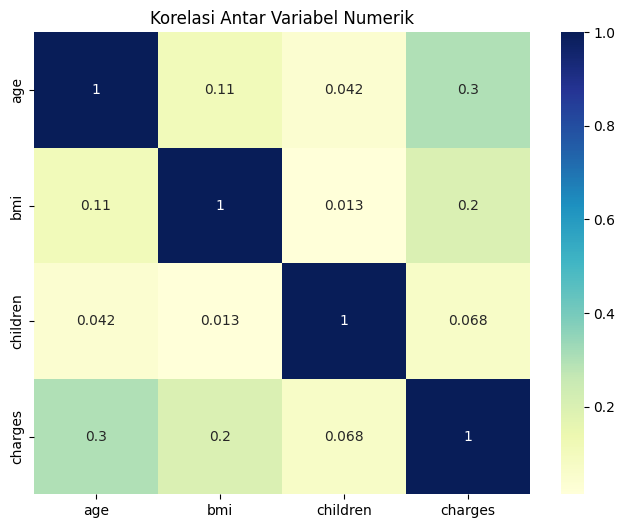

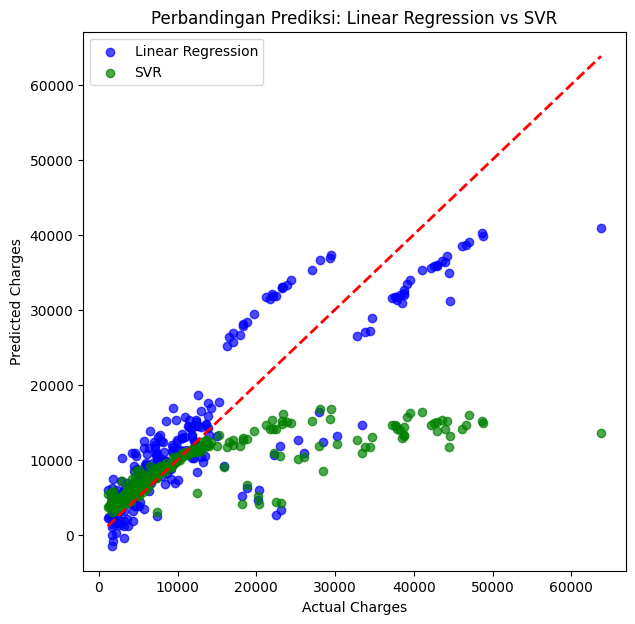

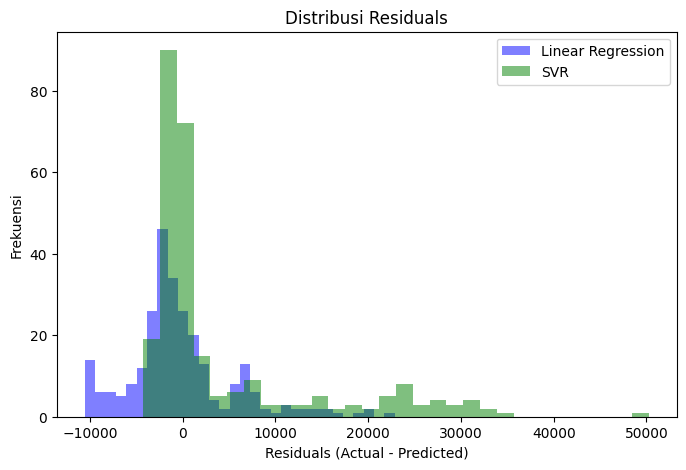

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_svr, alpha=0.7, color='green', label='SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Perbandingan Prediksi: Linear Regression vs SVR")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.hist(y_test - y_pred_lr, bins=30, alpha=0.5, label='Linear Regression', color='blue')
plt.hist(y_test - y_pred_svr, bins=30, alpha=0.5, label='SVR', color='green')
plt.title("Distribusi Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

In [23]:
print(f"""
=== ANALISIS AKHIR ===
Linear Regression:
- R² = {r2_lr:.4f}, RMSE = {rmse_lr:.2f}, MAE = {mae_lr:.2f}

SVR (RBF):
- R² = {r2_svr:.4f}, RMSE = {rmse_svr:.2f}, MAE = {mae_svr:.2f}

Interpretasi:
- Linear Regression menjelaskan sekitar {r2_lr*100:.1f}% variasi data.
- SVR menangkap hubungan non-linear dan bisa meningkatkan akurasi.
- Model terbaik ditentukan dari nilai R² tertinggi dan error (RMSE/MAE) terendah.
""")


=== ANALISIS AKHIR ===
Linear Regression:
- R² = 0.7836, RMSE = 5796.28, MAE = 4181.19

SVR (RBF):
- R² = 0.2697, RMSE = 10647.75, MAE = 5695.16

Interpretasi:
- Linear Regression menjelaskan sekitar 78.4% variasi data.
- SVR menangkap hubungan non-linear dan bisa meningkatkan akurasi.
- Model terbaik ditentukan dari nilai R² tertinggi dan error (RMSE/MAE) terendah.



Kinerja SVR sedikit lebih rendah dari regresi linear (R² lebih kecil).

Namun MAE-nya mirip — artinya model SVR cukup stabil walau lebih kompleks.

Heatmap Korelasi Variabel Menunjukkan hubungan antara variabel numerik (age, bmi, children, charges)

smoker_yes sangat berkorelasi kuat dengan charges → biaya medis jauh lebih tinggi bagi perokok.

Scatter Plot Prediksi vs Aktual Menunjukkan seberapa dekat hasil prediksi dengan nilai sebenarnya.
Jika titik-titik mendekati garis y = x, model dianggap baik.

Histogram Residuals Menunjukkan sebaran kesalahan prediksi. Sebaran yang simetris menandakan model cukup baik.

Model Multiple Linear Regression memberikan hasil yang baik (R² ≈ 0.78).

Variabel yang paling berpengaruh terhadap biaya medis adalah smoker_yes (status perokok), age (usia), bmi (tingkat obesitas)

Model SVR memberikan hasil yang sedikit lebih rendah, karena sifatnya lebih kompleks dan memerlukan tuning parameter yang lebih hati-hati.